# Star Wars Survey

## Introduction

This is the 6th DataQuest project in Step 2: Data Analysis and Visualization.

This is my 8th DataQuest project in the Data Scientist pathway.

In this project, I'll be examining survey data collected by FiveThirtyEight using SurveyMonkey. The main question that I'll be looking to answer is: "Does America realize that 'The Empire Strikes Back' is clearly the best StarWars film".

## Data Cleaning

In [1]:
## Load in packages
import numpy as np
import pandas as pd

## Load in DataFrame
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
## Examine the data

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [4]:
## Remove rows with missing Respondent_ID

star_wars = star_wars[star_wars["RespondentID"].notnull()]

In [5]:
## Confirm that Respondent_IDs only contain rows with values

print(star_wars["RespondentID"])



1       3.292880e+09
2       3.292880e+09
3       3.292765e+09
4       3.292763e+09
5       3.292731e+09
6       3.292719e+09
7       3.292685e+09
8       3.292664e+09
9       3.292654e+09
10      3.292640e+09
11      3.292638e+09
12      3.292635e+09
13      3.292609e+09
14      3.292597e+09
15      3.292587e+09
16      3.292583e+09
17      3.292581e+09
18      3.292573e+09
19      3.292565e+09
20      3.292562e+09
21      3.292522e+09
22      3.292521e+09
23      3.292512e+09
24      3.292483e+09
25      3.292465e+09
26      3.292448e+09
27      3.292420e+09
28      3.292384e+09
29      3.292380e+09
30      3.292377e+09
            ...     
1157    3.288426e+09
1158    3.288423e+09
1159    3.288423e+09
1160    3.288422e+09
1161    3.288421e+09
1162    3.288418e+09
1163    3.288418e+09
1164    3.288417e+09
1165    3.288415e+09
1166    3.288414e+09
1167    3.288413e+09
1168    3.288410e+09
1169    3.288410e+09
1170    3.288409e+09
1171    3.288403e+09
1172    3.288403e+09
1173    3.288

In [6]:
## Convert Yes/No answers in
## "Have you seen any of the 6 films in the Star Wars franchise" to True/False
## and
## "Do you consider yourself to be a fan of the Star Wars film franchise?"

yes_no = {
    "Yes": True,
    "No" : False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())

print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts())


True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [7]:
seen = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False,
    
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(seen)


In [8]:
movie_titles = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"    
}

star_wars.rename(columns=movie_titles, inplace=True)

In [9]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [10]:
## Convert ranking columns to float

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

ranking_titles = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
    
}

star_wars.rename(columns=ranking_titles, inplace=True)

In [11]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [12]:
## Find the means of all the columns
means = star_wars.mean(axis=0)

print(means)

RespondentID                                                             3.290128e+09
Have you seen any of the 6 films in the Star Wars franchise?             7.892074e-01
Do you consider yourself to be a fan of the Star Wars film franchise?    6.602871e-01
seen_1                                                                   5.674536e-01
seen_2                                                                   4.814503e-01
seen_3                                                                   4.637437e-01
seen_4                                                                   5.118044e-01
seen_5                                                                   6.391231e-01
seen_6                                                                   6.222597e-01
ranking_1                                                                3.732934e+00
ranking_2                                                                4.087321e+00
ranking_3                                             

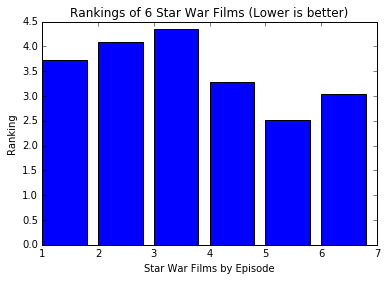

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(1,7), star_wars[star_wars.columns[9:15]].mean())
plt.title("Rankings of 6 Star War Films (Lower is better)")
plt.xlabel("Star War Films by Episode")
plt.ylabel("Ranking")

The above plot contains the rankings (1 being the best, 6 being the worst) of the first 6 StarWar films. The analysis indicates that the least favorite film is III, that is: Star Wars: Episode III Revenge of the Sith.

The favorite film is the "fifth" one (Star Wars movies were released in the order of 4,5,6,1,2,3.

The most favorite film is Star Wars: Episode V The Empire Strikes Back

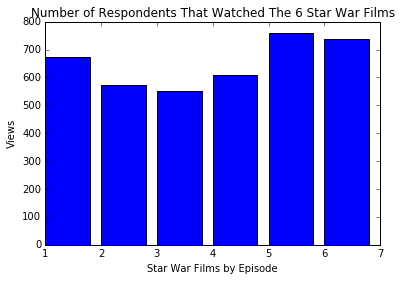

In [14]:
plt.bar(range(1,7), star_wars[star_wars.columns[3:9]].sum() )

plt.title("Number of Respondents That Watched The 6 Star War Films")
plt.xlabel("Star War Films by Episode")
plt.ylabel("Views")

The data shows that among survey responders, the most watched films were Episode I, V, and VI. This is interesting given that the first episode of Star Wars was original Episode IV.

## Gender Analysis

We can split the data by gender and repeat the same analysis, viewing the ranking of the films and the view rate among respondents.

In [15]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

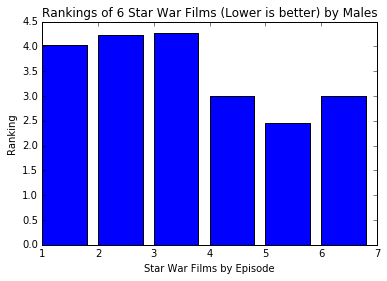

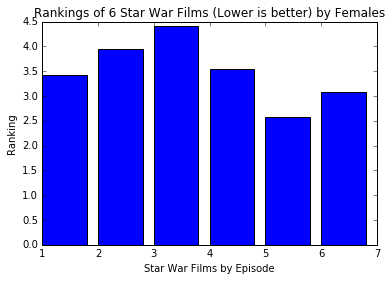

In [16]:
plt.bar(range(1,7), males[males.columns[9:15]].mean())
plt.title("Rankings of 6 Star War Films (Lower is better) by Males")
plt.xlabel("Star War Films by Episode")
plt.ylabel("Ranking")
plt.show()

plt.bar(range(1,7), females[females.columns[9:15]].mean())
plt.title("Rankings of 6 Star War Films (Lower is better) by Females")
plt.xlabel("Star War Films by Episode")
plt.ylabel("Ranking")
plt.show()


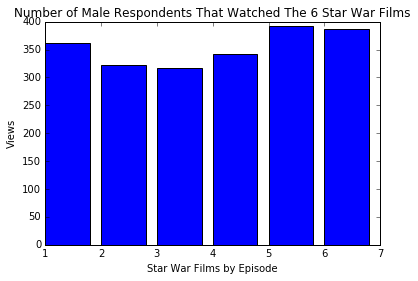

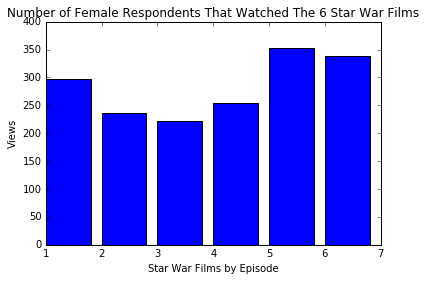

In [17]:
plt.bar(range(1,7), males[males.columns[3:9]].sum() )


plt.title("Number of Male Respondents That Watched The 6 Star War Films")
plt.xlabel("Star War Films by Episode")
plt.ylabel("Views")

plt.show()

plt.bar(range(1,7), females[females.columns[3:9]].sum() )

plt.title("Number of Female Respondents That Watched The 6 Star War Films")
plt.xlabel("Star War Films by Episode")
plt.ylabel("Views")

plt.show()

The graphs show that both males and females have the same preferences generally. The only differences are the females seem to have greater difference in their rankings, and fewer females saw Star Wars in the sur